<a href="https://colab.research.google.com/github/swapnita-pandey/Handwritten-Digit-Classification/blob/main/mnist_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
import random

#importing images from mnist data set

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Printing how much images does our training data has.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Showing some random pictures of each digit

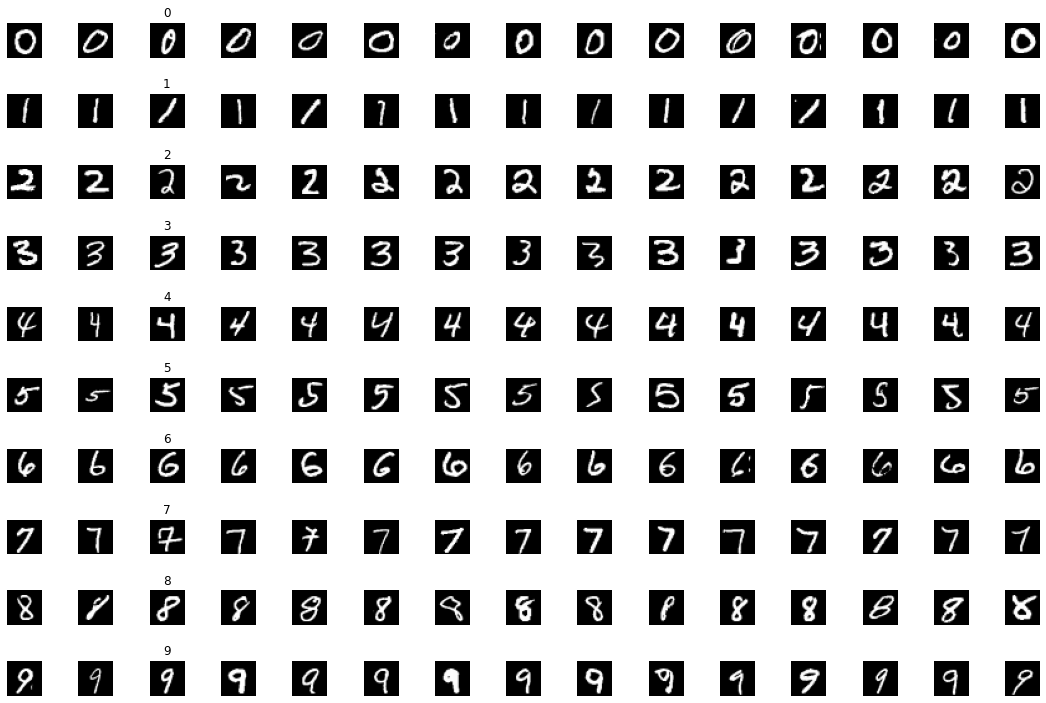

In [ ]:
num_of_samples = []

cols = 15
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                        figsize=(15, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)),
                                :, :],
                     cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))


# We can see each of the digits has how much images from code below.

Number of samples: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

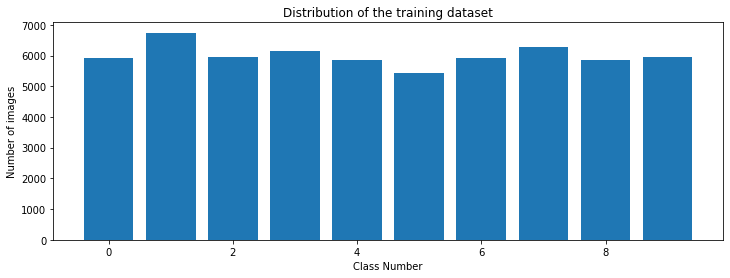

In [ ]:
print("Number of samples:", num_of_samples)
plt.figure(figsize=(12, 4))       # width and height in inches
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Each image has Intensity from 0 to 255

In [ ]:
X_train = X_train/255
X_test = X_test/255


#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                          num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                        num_pixels)
print(X_train.shape)
print(X_test.shape)



(60000, 784)
(10000, 784)


# creating the model

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=num_pixels,
                  activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


# We can see our layers with how much parameter has the layer

In [ ]:
model = create_model()
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
Total params: 118,392
Trainable params: 118,392
Non-trainable params: 0
_________________________________________________________________
None


# Now we can train and see the results.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1,
                    epochs=10, batch_size=200, verbose=1, shuffle=1)


Epoch 1/10
270/270 [==============================] - 5s 16ms/step - loss: 0.5580 - accuracy: 0.8369 - val_loss: 0.1819 - val_accuracy: 0.9500
Epoch 2/10
270/270 [==============================] - 3s 12ms/step - loss: 0.1725 - accuracy: 0.9511 - val_loss: 0.1177 - val_accuracy: 0.9688
Epoch 3/10
270/270 [==============================] - 2s 8ms/step - loss: 0.1169 - accuracy: 0.9656 - val_loss: 0.0960 - val_accuracy: 0.9725
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.0867 - accuracy: 0.9741 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 5/10
270/270 [==============================] - 2s 6ms/step - loss: 0.0675 - accuracy: 0.9803 - val_loss: 0.0895 - val_accuracy: 0.9752
Epoch 6/10
270/270 [==============================] - 2s 7ms/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.0835 - val_accuracy: 0.9768
Epoch 7/10
270/270 [==============================] - 2s 8ms/step - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.0832 - val_accuracy: 0.9775
Epoc

# We will keep our training model in history so we can plot and see some visual content

Text(0.5, 0, 'epoch')

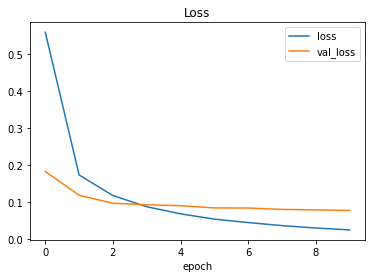

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


# We can see accuracy as well

Text(0.5, 0, 'epoch')

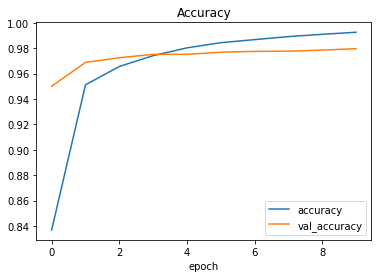

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')


# Printing test score and accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])


<class 'list'>
Test Score: 0.08994011580944061
Test Accuracy: 0.9765999913215637


# Now we will get our image from a url and show it.

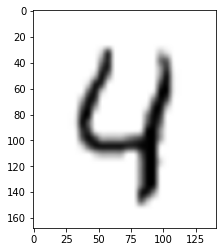

In [ ]:
import requests
from PIL import Image

# 0
#url = 'https://i.pinimg.com/originals/3e/d0/8e/3ed08e00953b3bac40630f03d53c5558.jpg'
# 1
#url = 'https://weeknumber.in/gfx/200x200/1.png'
# 2
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# 3
#url = 'https://www.neuralnine.com/wp-content/uploads/2019/09/3.png'
# 4
url = 'https://miro.medium.com/max/282/1*xpszL7jJrV5UTV7Xa-fgWQ.png'
# 5
#url = 'https://ak.picdn.net/shutterstock/videos/23708539/thumb/1.jpg'
# 6
#url = 'https://ak.picdn.net/shutterstock/videos/23708536/thumb/1.jpg'
# 7
#url = 'https://weeknumber.in/gfx/200x200/7.png'
#8
#url = 'https://miro.medium.com/max/540/1*xq-pY9H9rzGjiQ7MTrMBoA.png'
# 9
#url = 'https://weeknumber.net/gfx/200x200/9.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


# Now we will resize this image and greyscale it. Then we will transform this image to our specific input format(1*784).
# We can see our image with greyscale format.

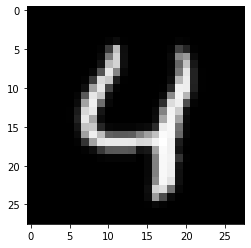

In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # (28, 28)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
#print(image)


# Now we will resize it and feed the input.

In [ ]:
image = image / 255
image = image.reshape(1, 784)


# And then finally we make the prediction.

In [ ]:
prediction = model.predict(image)
print("prediction probability:", str(prediction))
prediction = np.argmax(prediction, axis=1)
print("predicted digit:", str(prediction))


prediction probability: [[8.5681631e-09 3.5574814e-07 1.3087629e-09 2.5339205e-11 9.9998283e-01
  5.9298649e-10 1.0317767e-08 5.1942726e-07 1.5680327e-07 1.6215114e-05]]
predicted digit: [4]
